In [1]:
%run ../definitions.ipynb

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# Cs - 137
# cS1 peak position: 1431.9
# cS2 peak position: 86757.7

# Na-22
# cS1 peak position: 1156.6
# cS2 peak position: 64741.3

In [3]:
cs1_per_E =      [ 1156.6 / 511., 1431.9/661.6]
bs2_per_E =      [64741.3 / 511.,  86757.7/661.6]
E  =             [511, 661.6]
res_ces =        np.array([0.062807, 0.055436781])
res_s1 =         np.array([0.16675798276, 0.15348183740])
res_s2 =         np.array([0.1305540, 0.09745874])

In [67]:
### SECOND ITERATION
# From fits
s1  = [1154.2044765929927, 1423.2931807093228, 2594.909767882044]
ds1 = [2.785102481203028, 4.430965817882083,1.3396457855016182]
s2 = [64617.9, 86374.33003719049, 136825.52310391146]
ds2 = [127.885, 203.01244441931775, 716.6131730234451]

# Literature
energies = [511, 661.6, 1118.1]

# Derived values
s1_per_e = [_s1/_e for _s1, _e in zip(s1, energies)]
ds1_per_e = [_ds1/_e for _ds1, _e in zip(ds1, energies)]
s2_per_e = [_s2/_e for _s2, _e in zip(s2, energies)]
ds2_per_e = [_ds2/_e for _ds2, _e in zip(ds2, energies)]

### g1, g2, and the doke plot

In [82]:
# Is it overkill to fit a line to two points? Well, yes, it most certainly is! 
# So why am I doing it? I have hope to add a third point somewhere in the future....
def p1(x, a0, a1):
    return a0 + a1 * x

def doke(s2_over_e, g1, g2):
    return g1/(13.7e-3) - (g1/g2) * s2_over_e

# def 

popt, pcov = scipy.optimize.curve_fit(p1, s2_per_e, s1_per_e, p0=[4, -0.01])
popt2, pcov2 = scipy.optimize.curve_fit(doke, s2_per_e, s1_per_e, p0=[1, 1])
popt3, pcov3 = scipy.optimize.curve_fit(doke, s2_per_e, s1_per_e, p0=popt2, sigma = ds1_per_e)

In [83]:
popt3

array([ 0.06412661,  3.32577929])

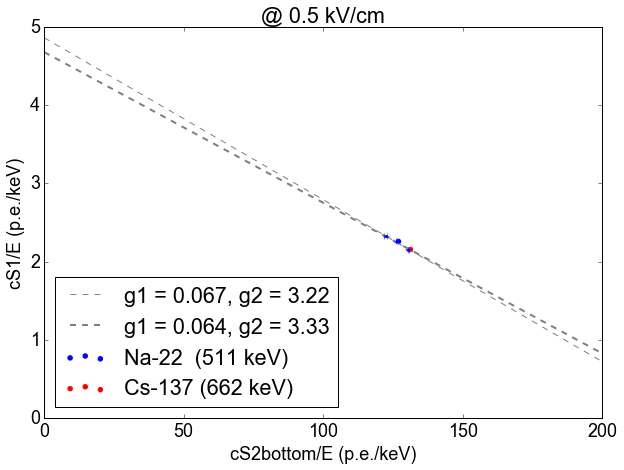

In [84]:
x_plot = np.linspace(0, 200, 10)
plt.plot(x_plot, doke(x_plot, *popt2), ls='--', color='gray', lw=1, 
         label='g1 = %.3f, g2 = %.2f' % (popt2[0], popt2[1]))
plt.plot(x_plot, doke(x_plot, *popt3), ls='--', color='gray', lw=2, 
         label='g1 = %.3f, g2 = %.2f' % (popt3[0], popt3[1]))
plt.scatter(bs2_per_E[0], cs1_per_E[0], color='blue', label='Na-22  (511 keV)')
plt.scatter(bs2_per_E[1], cs1_per_E[1], color='red', label='Cs-137 (662 keV)')
plt.xlabel('cS2bottom/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.legend(loc='lower left')
plt.xlim(0, 200)
plt.ylim(0, 5)
plt.title('@ 0.5 kV/cm')


plt.errorbar(s2_per_e, s1_per_e, xerr = ds2_per_e, yerr= ds1_per_e, ls='None', marker='.', markersize=5)
# plt.xlim(120, 135)
# plt.ylim(2, 2.4)
# plt.savefig('plots/na_vs_cs_doke_new.png')

plt.show()

In [87]:
pcov3

array([[  1.80747118e-05,  -9.15421223e-04],
       [ -9.15421223e-04,   4.63949761e-02]])

In [89]:
np.sqrt(np.diag(pcov3))

array([ 0.00425144,  0.21539493])

### Energy resolutions

In [45]:
def err_v_e(e, e0, e1):
    return e0  + e1 * np.sqrt(1/e)

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


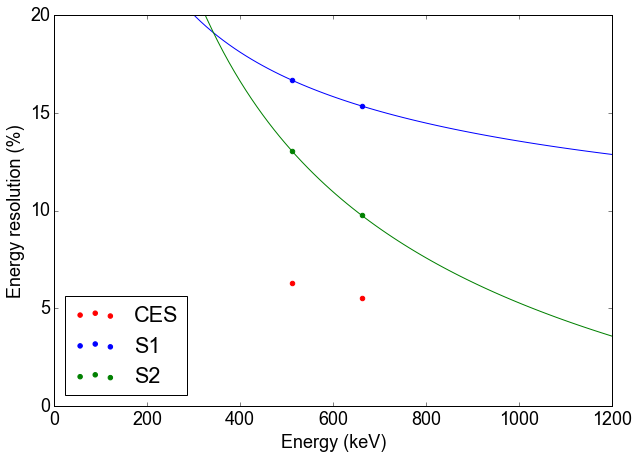

In [60]:
plt.scatter(E, 100*res_ces, color='red', label='CES')
plt.scatter(E, 100*res_s1, color='blue', label='S1')
plt.scatter(E, 100*res_s2, color='green', label='S2')

popt_err_s1, _ = scipy.optimize.curve_fit(err_v_e, energies,  100*res_s1, p0=[10, 200])
popt_err_s2, _ = scipy.optimize.curve_fit(err_v_e, energies,  100*res_s2, p0=[10, 200])

x_plot = np.linspace(0, 1200, 100)
# plt.plot(x_plot, err_v_e(x_plot, 10, 200))
plt.plot(x_plot, err_v_e(x_plot, *popt_err_s1))
plt.plot(x_plot, err_v_e(x_plot, *popt_err_s2))




plt.xlabel('Energy (keV)')
plt.ylabel('Energy resolution (%)')
plt.ylim(0,20)
plt.xlim(0, 1200)
plt.legend(loc='lower left')

In [61]:
def get_compton_energy(e):
    '''
    
    https://en.wikipedia.org/wiki/Compton_edge (but I also checked other places, don't worry)
    '''
    return e*(1-1/(1+(2*e/511.)))

In [65]:
get_compton_energy(1332.5)

1118.1084697732997

In [66]:
err_v_e(1118, *popt_err_s2)

4.2066269151954341

In [58]:
popt_err_s1

array([ -14.26125198,  617.50136194])